In [128]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [129]:
# date_0 = '2000-08-01'
# date_1 = '2022-09-01'
# date_2 = '2022-10-01'
# stock = '0050.TW'

# data = yf.Ticker(stock).history(start=date_0, end=date_1)
# price = data['Close']
# x = np.array(price)

# data2 = yf.Ticker("0050.TW").history(start=date_0, end=date_2)
# price2 = data2['Close']
# x2 = np.array(price2)
# price

In [130]:
# stock = '^GSPC'
# data = yf.Ticker(stock).history(period='1y').reset_index()
# price = data['Close']
# x = np.array(price)

In [131]:
def input_siganl(t, sample_rate):
    f = 10
    x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
    phase = np.pi/4
    print(phase)
    # return (np.sin(f * 2 * np.pi * x + phase))
    # return (np.sin(f * 2 * np.pi * x + phase) +    
    #         np.sin(3 * f * 2 * np.pi * x + phase) / 2 + 
    #         np.sin(4 * f * 2 * np.pi * x) / 5 +
    #         np.sin(8 * f * 2 * np.pi * x) / 3)

    return (np.sin(f * 2 * np.pi * x + phase) +    
        np.sin(3 * f * 2 * np.pi * x + phase) / 2)

In [133]:
t = 2              # 取樣時間
sample_rate = 800  # 取樣率，每秒取幾個樣本
samples = input_siganl(t, sample_rate)
x = samples[0:int(len(samples)/3)]

0.7853981633974483


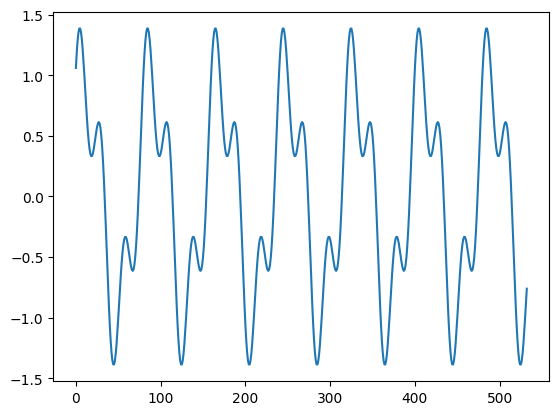

In [142]:
plt.plot(x)

In [134]:
# n_predict = price2.size - price.size
# print('n_predict = ', n_predict)
n = x.size
print('n = ', n)
n_harm = 10                     # number of harmonics in model
t = np.arange(0, n)
p = np.polyfit(t, x, 1)         # find linear trend in x
x_notrend = x - p[0] * t        # detrended x

n =  533


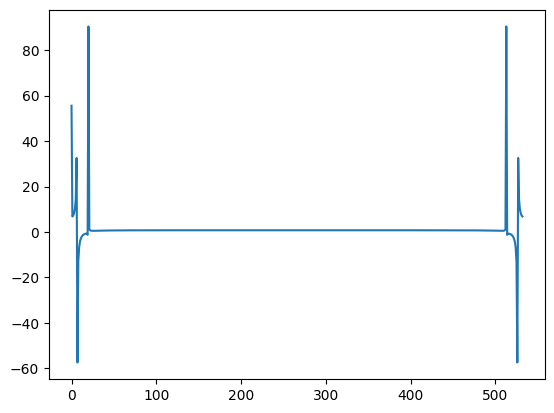

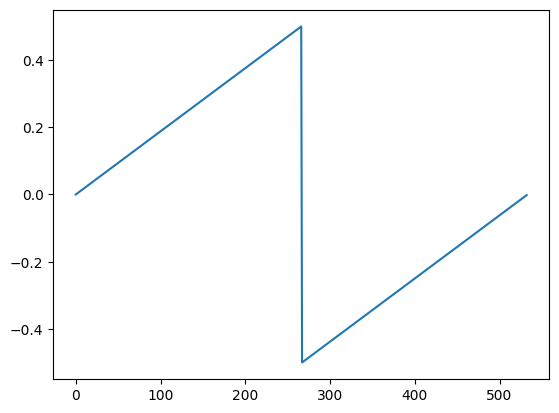

In [135]:
x_freqdom = fft.fft(x_notrend,n)  # detrended x in frequency domain
pl.plot(x_freqdom)
pl.show()
f = fft.fftfreq(n)
pl.plot(f)
pl.show()

In [136]:
indexes = list(range(n))             # frequencies

# indexes.sort(key = lambda i: np.absolute(f[i]))  # sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
indexes.reverse() # sort indexes by amplitudes, higher -> lower 
t = np.arange(0, n)
restored_sig = np.zeros(t.size)

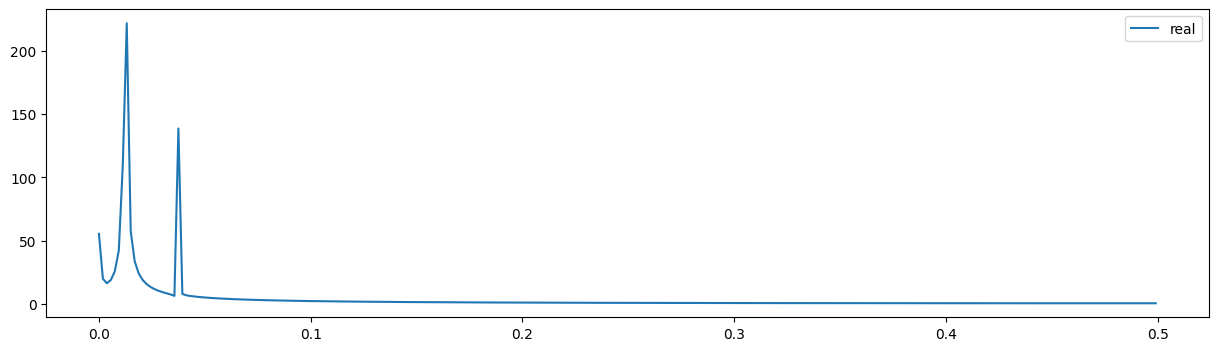

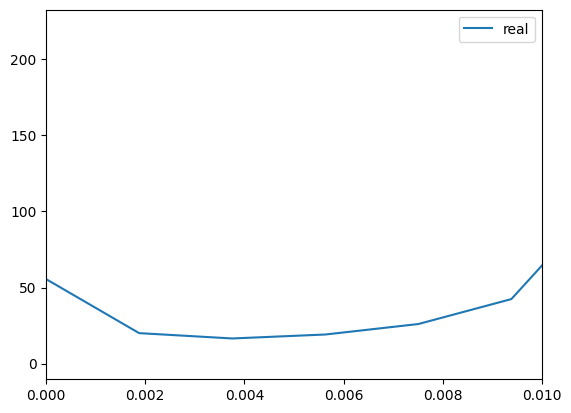

C:\Users\e4903\AppData\Local\Temp\ipykernel_37416\3857585851.py:15: RuntimeWarning: divide by zero encountered in divide
  pl.plot(1/f[mask], abs(x_freqdom[mask]), label="real")


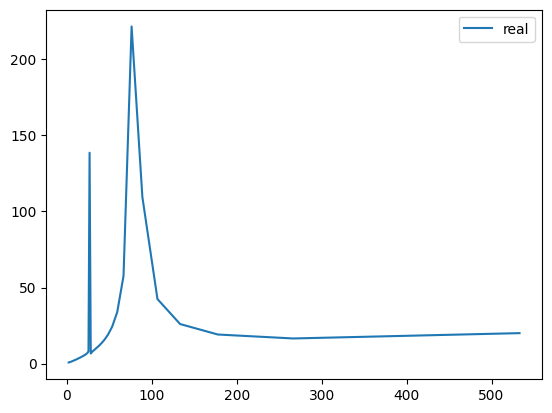

In [137]:
mask = np.where(f >= 0)
# print(mask)
pl.plt.figure(figsize=(15,4))
# pl.xlim(0,0.01)
pl.plot(f[mask], abs(x_freqdom[mask]), label="real")
pl.legend()
pl.show()

pl.plot(f[mask], abs(x_freqdom[mask]), label="real")
pl.xlim(0,0.01)
pl.legend()
pl.show()


pl.plot(1/f[mask], abs(x_freqdom[mask]), label="real")
# pl.xlim(0,0.01)
pl.legend()
pl.show()


In [138]:
t = np.arange(0, 3*n)

i =  7
fequence :  0.013133208255159474
phase :  -1.8329642330756777


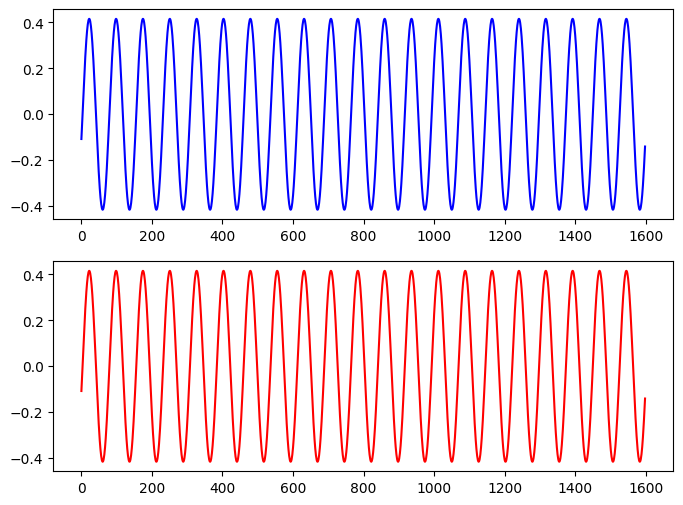

i =  6
fequence :  0.01125703564727955
phase :  1.2689716701793718


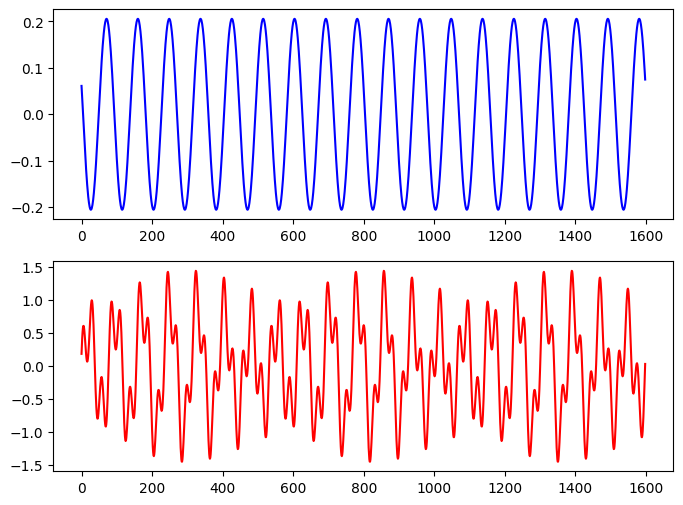

i =  8
fequence :  0.0150093808630394
phase :  -1.798921600162844


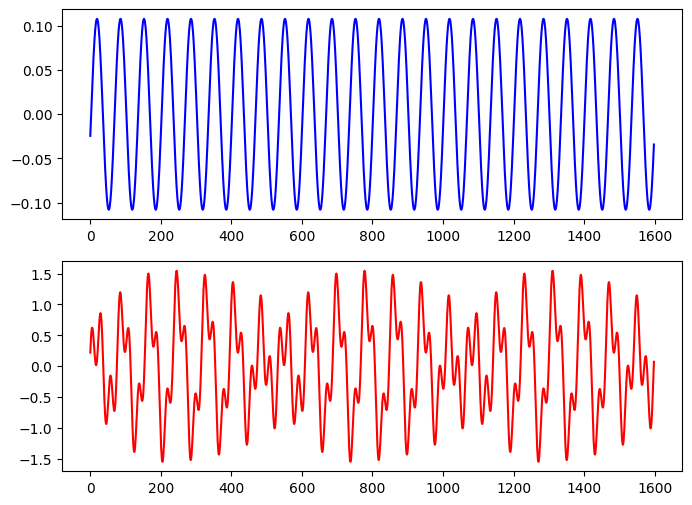

i =  0
fequence :  0.0
phase :  0.0


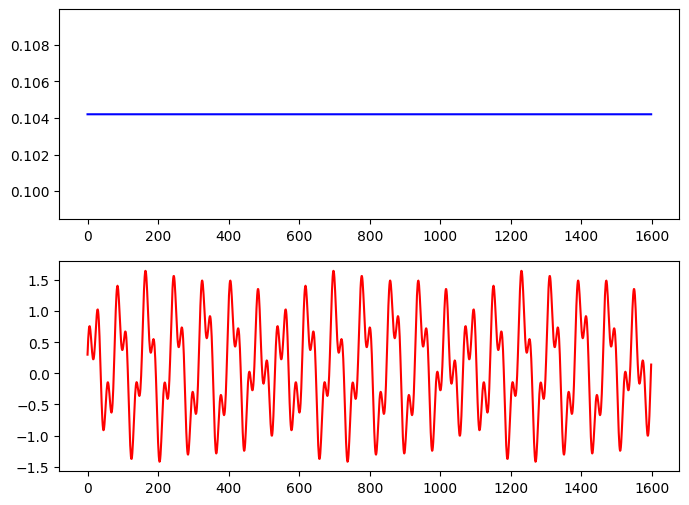

i =  5
fequence :  0.009380863039399626
phase :  1.2233420534255366


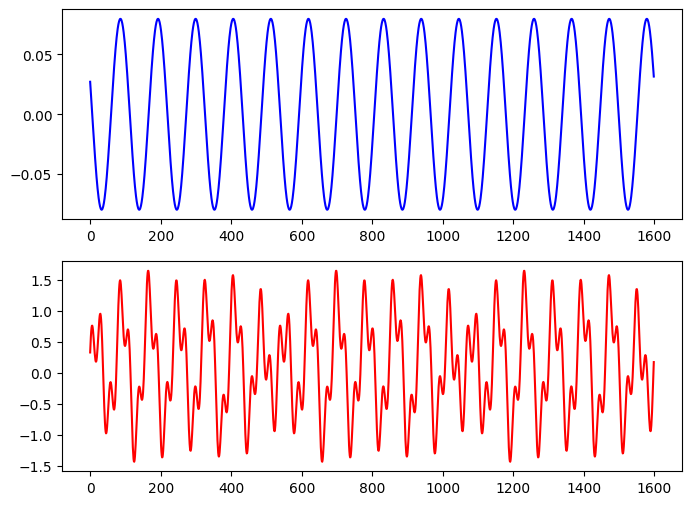

i =  9
fequence :  0.016885553470919325
phase :  -1.7696854703468328


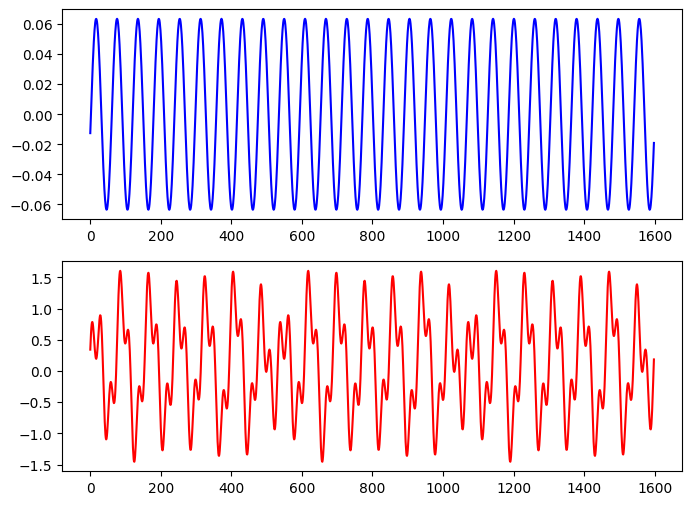

i =  4
fequence :  0.0075046904315197
phase :  1.173361014058741


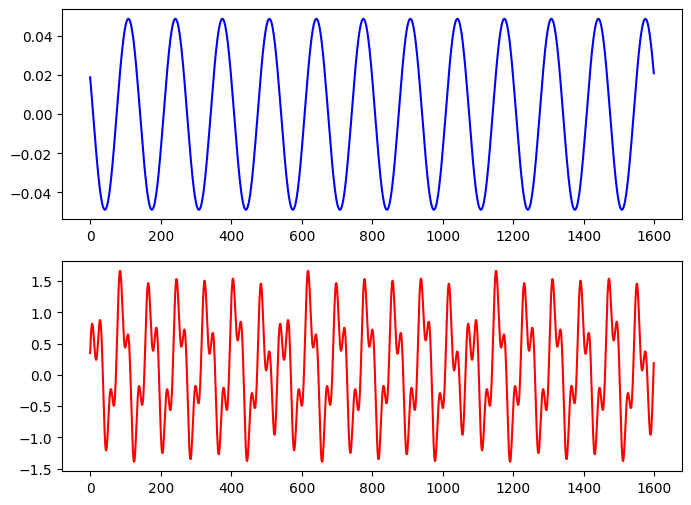

i =  1
fequence :  0.001876172607879925
phase :  1.2237168111941161


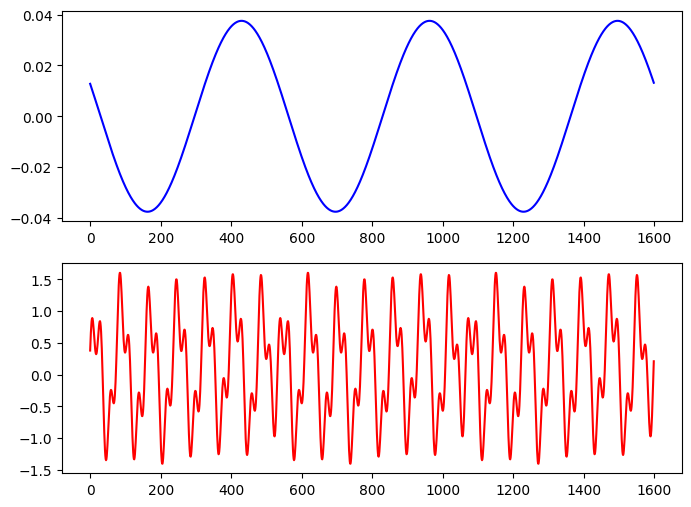

In [139]:
restored_sig = 0
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)
    restored_sig += signal

    if( i < 10) :
        print('i = ',i)
        print('fequence : ' ,abs(f[i]))
        # print('Period : ' ,1/abs(f[i]) ,'(Days)')
        print('phase : ', phase)
        fig, axes = plt.subplots(2, 1, figsize=(8, 6))
        axes[0].plot(signal, 'b',label = 'sig')
        axes[1].plot(restored_sig, 'r',label = 'restored_sig')
        plt.show()
signal = restored_sig + p[0] * t

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


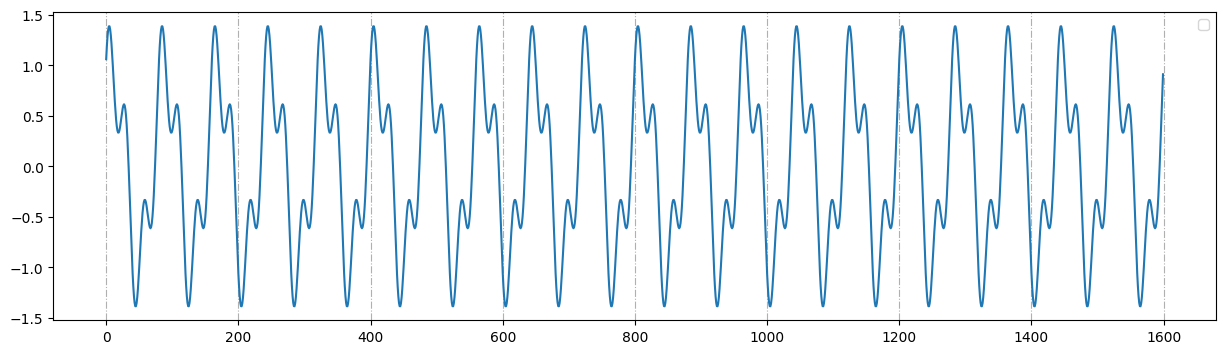

In [140]:
pl.plt.figure(figsize=(15,4))
pl.plot(samples)

pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

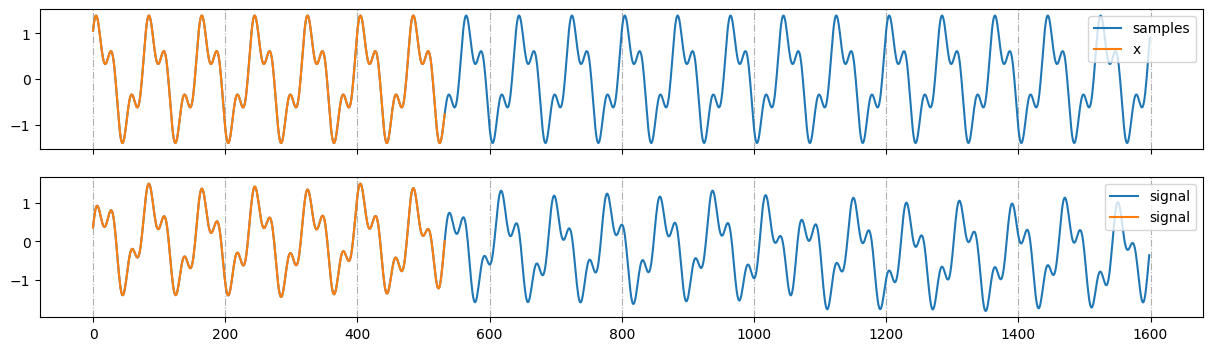

In [141]:
fig, axes = pl.subplots(2, 1, figsize=(15,4), sharex=True)
# pl.plt.figure(figsize=(15,4))

axes[0].plot(samples, label='samples')
axes[0].plot(x, label='x')
axes[1].plot(signal, label='signal')
axes[1].plot(signal[0:len(x)], label='signal')
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
# pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
# pl.plot(price2.index, signal, 'r',label = 'Predict')
axes[0].grid(axis='x',linestyle='-.')
axes[1].grid(axis='x',linestyle='-.')
axes[0].legend()
axes[1].legend()
pl.show()